## Part 1: Matplotlib

In [16]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in the data: 

In [ ]:
#dictionary of data paths for each country
data_paths = {
    'AFG': '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-afg--age--gender--year.csv',
    'YEM': '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-yem--age--gender--year.csv',
    'TUR': '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-tur--age--gender--year.csv',
    'LUX': '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-lux--age--gender--year.csv',
    'DJI': '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-dji--age--gender--year.csv'
}

data = {}
for country, path in data_paths.items():
    data[country] = pd.read_csv(path)

## Calculating and plotting population trends

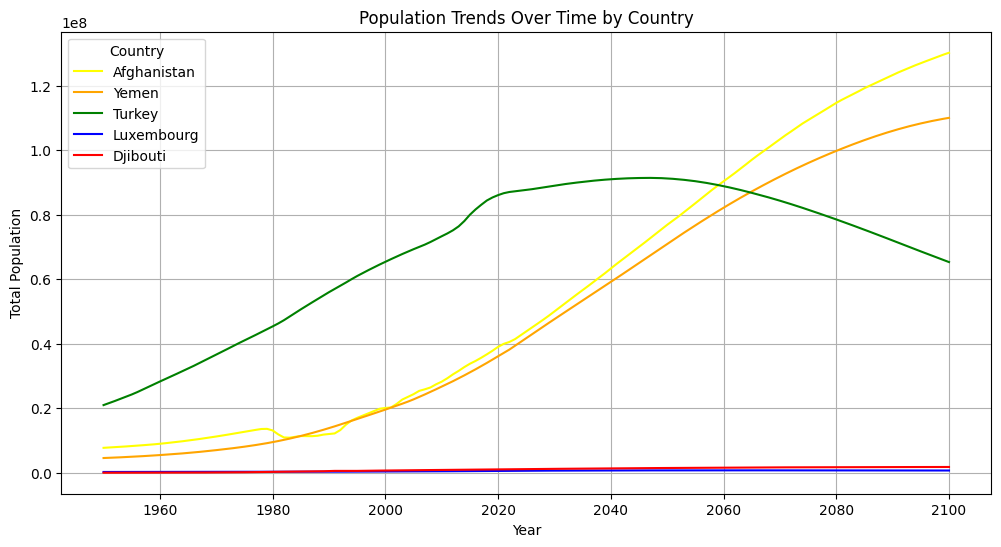

In [18]:
yearly_populations = {}

#group by year and sum population
for country, df in data.items():
    yearly_populations[country] = df.groupby('year')['population'].sum()


#plotting
plt.figure(figsize=(12, 6))

plt.plot(yearly_populations['AFG'].index, yearly_populations['AFG'].values, label='Afghanistan', color= "yellow")
plt.plot(yearly_populations['YEM'].index, yearly_populations['YEM'].values, label='Yemen', color= "orange")
plt.plot(yearly_populations['TUR'].index, yearly_populations['TUR'].values, label='Turkey', color="green")
plt.plot(yearly_populations['LUX'].index, yearly_populations['LUX'].values, label='Luxembourg', color= "blue")
plt.plot(yearly_populations['DJI'].index, yearly_populations['DJI'].values, label='Djibouti', color= "red")

plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Trends Over Time by Country')
plt.legend(title='Country')
plt.grid(True)
plt.show()


## Demographic shift for Turkey using stacked bar charts

/tmp/ipykernel_4231/3802696014.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = df_filtered.groupby(['year', 'age_group']).size().unstack(fill_value=0)
/tmp/ipykernel_4231/3802696014.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, percentage.iloc[i].cumsum()[j] - percentage.iloc[i][j]/2,
/tmp/ipykernel_4231/3802696014.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{percentage.iloc[i

<Figure size 1200x800 with 0 Axes>

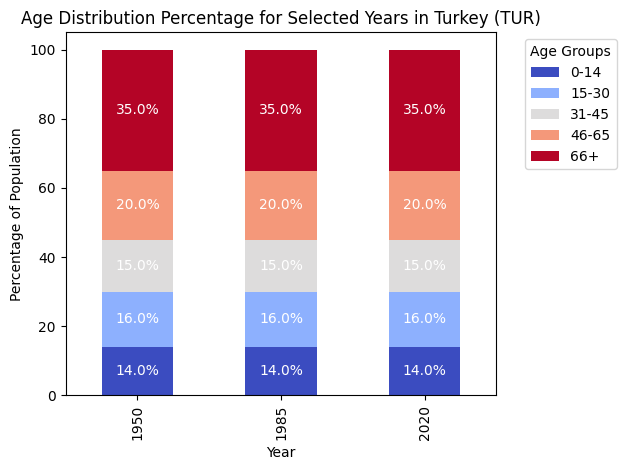

In [27]:
df = pd.read_csv('/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-tur--age--gender--year.csv')

#age bins and labels
bins = [0, 14, 30, 45, 65, float('inf')]
labels = ['0-14', '15-30', '31-45', '46-65', '66+']

#create a new column for age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

#filter for the specified years
df_filtered = df[df['year'].isin([1950, 1985, 2020])]

#group by year and age group, then count occurrences
age_distribution = df_filtered.groupby(['year', 'age_group']).size().unstack(fill_value=0)
#calculate percentages
percentage = age_distribution.div(age_distribution.sum(axis=1), axis=0) * 100


import matplotlib.pyplot as plt

#create a stacked bar chart
plt.figure(figsize=(12, 8))
ax = percentage.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Age Distribution Percentage for Selected Years in Turkey (TUR)')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

#add percentage annotations
for i in range(len(percentage)):
    for j in range(len(percentage.columns)):
        ax.text(i, percentage.iloc[i].cumsum()[j] - percentage.iloc[i][j]/2, 
                f'{percentage.iloc[i][j]:.1f}%', 
                ha='center', va='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

## Part 2: Seaborn

/tmp/ipykernel_4231/2798613589.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019['age_group'] = pd.cut(data_2019['age'], bins=age_bins, labels=age_labels, right=True)
/tmp/ipykernel_4231/2798613589.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = data_2019.groupby('age_group')['population'].sum().reset_index()
/tmp/ipykernel_4231/2798613589.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

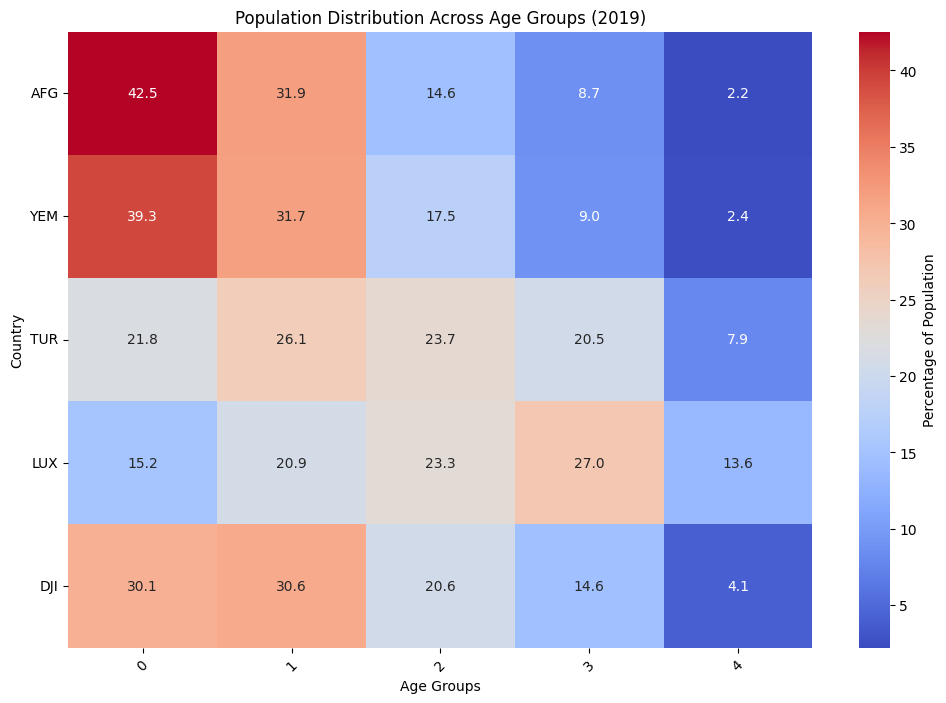

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#CSV filenames and their respective country names
country_files = {
    'AFG': '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-afg--age--gender--year.csv',
    'YEM': '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-yem--age--gender--year.csv',
    'TUR': '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-tur--age--gender--year.csv',
    'LUX': '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-lux--age--gender--year.csv',
    'DJI': '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-dji--age--gender--year.csv'
}

age_bins = [0, 14, 30, 45, 65, float('inf')]
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']

#create an empty DataFrame for the heatmap data
heatmap_data = pd.DataFrame()

#loop through each country file
for country, file in country_files.items():
    data = pd.read_csv(file)

    #filter for the year 2019 and group by age
    data_2019 = data[data['year'] == 2019]
    data_2019['age_group'] = pd.cut(data_2019['age'], bins=age_bins, labels=age_labels, right=True)

    #group by age and sum the population
    age_distribution = data_2019.groupby('age_group')['population'].sum().reset_index()

    #calculate percentages
    age_distribution['percentage'] = age_distribution['population'] / age_distribution['population'].sum() * 100

    #add the percentages to the heatmap data
    heatmap_data[country] = age_distribution['percentage']

#plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Percentage of Population'})
plt.title('Population Distribution Across Age Groups (2019)')
plt.xlabel('Age Groups')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


This heatmap illustrates the population distribution across specified age groups (0-14, 15-30, 31-45, 46-65, 66+) for five different countries in the year 2019. Each cell in the heatmap represents the percentage of the total population for that age group within each country. Higher values indicate a larger proportion of the population in that age group, providing insights into the demographic structure and age distribution of each country.

## Violin plots comparing the age distributions between TUR and LUX in 2020, separated by gender.

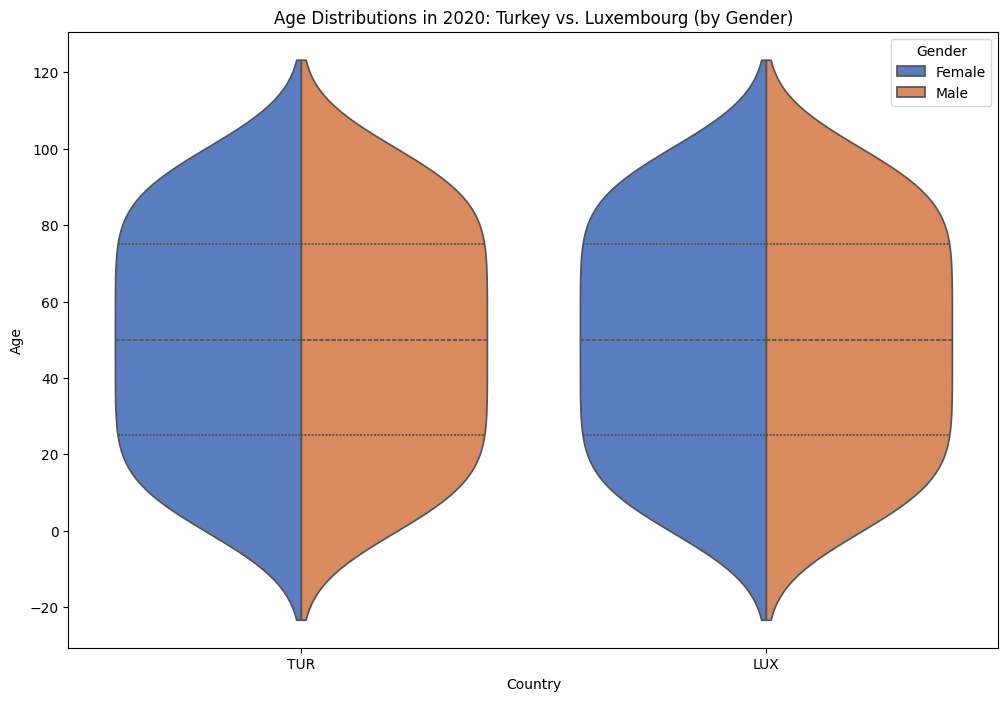

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#define CSV file paths for Turkey and Luxembourg
country_files = {
    'TUR': '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-tur--age--gender--year.csv',
    'LUX': '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-lux--age--gender--year.csv'
}

#create an empty DataFrame to store combined data for both countries
combined_data = pd.DataFrame()

#loop through each country file
for country, file in country_files.items():
    data = pd.read_csv(file)

    #filter for the year 2020 and keep only relevant columns
    data_2020 = data[data['year'] == 2020][['age', 'gender']]
    data_2020['country'] = country  

    #append the data to the combined DataFrame
    combined_data = pd.concat([combined_data, data_2020], ignore_index=True)

#map gender values to meaningful labels
combined_data['gender'] = combined_data['gender'].map({1: 'Female', 2: 'Male'})

#create side-by-side violin plots
plt.figure(figsize=(12, 8))
sns.violinplot(x='country', y='age', hue='gender', data=combined_data, split=True, inner='quartile', palette='muted')

#add labels and title
plt.title('Age Distributions in 2020: Turkey vs. Luxembourg (by Gender)')
plt.xlabel('Country')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()


The violin plots show the distribution of ages for males and females in both Turkey and Luxembourg. The plots can provide insights into the demographic structure of each country, highlighting potential factors like youthfulness or aging populations.

## Pairplot comparing population metrics across TUR, AFG, YEM, and DJI:

<Figure size 1200x1000 with 0 Axes>

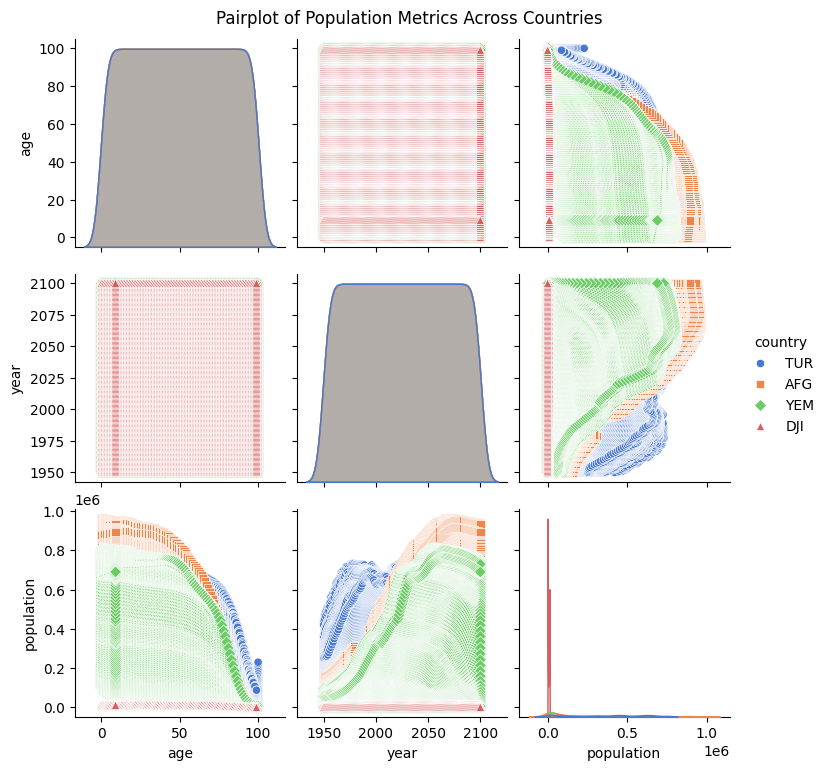

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#define the countries and their corresponding files
countries = ['tur', 'afg', 'yem', 'dji']
data_dir = '/workspaces/07-visualization-RayanHSaeed/ddf--datapoints--population--by--country--age--gender--year'
country_dataframes = []

#load data for each country and filter
for country in countries:
    file_path = os.path.join(data_dir, f'ddf--datapoints--population--by--country-{country}--age--gender--year.csv')
    df = pd.read_csv(file_path)
    df = df.copy()  
    df['country'] = country.upper()  
    country_dataframes.append(df)

#combine all data into one DataFrame
combined_df = pd.concat(country_dataframes, ignore_index=True)

#map gender values for better readability
combined_df['gender'] = combined_df['gender'].map({1: 'Male', 2: 'Female'})

#set the plot size
plt.figure(figsize=(12, 10))

#create the pairplot
sns.pairplot(combined_df, hue='country', markers=["o", "s", "D", "^"], palette='muted')

#set the title for the plot
plt.suptitle('Pairplot of Population Metrics Across Countries', y=1.02)
plt.show()


By analyzing the pairplot, we can draw insights about the demographic characteristics of these countries and how they compare with each other in terms of age, population, and gender metrics.